# MODEL BULDING

Regression model to predict the HUB SPOT SCORE

## 1. Import the data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data/finaldataset2.csv')

## 2. Lets take a look at the data

In [4]:
data.head()

,Unnamed: 0,HashPersonId,HashHubSpotId,Age,Gender,PrimaryNationality,HomeCountry,MktCountry,MktGeographicalArea,MktProvince,...,AveragePageViews,FirstURLSeen,FirstReferringSite,NumEventCompletions,FirstPageViewTime,LastPageViewTime,EngagementId,Type,CreatedTime,LastUpdateTime
0,0,2ed4c9b16bcc83689d9b7de0b22b1f316e9a328f,bce47850de7508a51a22eb6fd2f985488cc1a03d,26.0,Male,ECUADORIAN,NaN,Ecuador,Latin America,NaN,...,0,NaN,NaN,0,2021-01-25 22:41:02,NaN,10774608449,EMAIL,2021-01-26 23:33:10,2021-01-26 23:33:16
1,22,322a23f40b0a747bb96277178a7201c370fe78db,3372a24c295c98b83f509470a7e3e269e1ea03f3,24.0,Female,SPANISH,NaN,Spain,Spain,Madrid,...,0,NaN,NaN,0,2021-01-25 12:09:33,NaN,10760924913,EMAIL,2021-01-26 09:27:42,2021-01-26 09:27:45
2,23,bfc61a3fb1699b2b32a7daae3ab8f2f132f2fb52,5af332fcb4201e6d1951612a59eb5d8427eeb31e,22.0,Male,FRENCH,NaN,Spain,Spain,Barcelona,...,2,https://landings.ie.edu/masterland-ie-all-path...,https://www.ie.edu/school-global-public-affair...,0,2021-01-24 22:50:43,2021-02-17 21:50:23,10737825994,EMAIL,2021-01-25 10:27:09,2021-01-25 10:27:09
3,115,17cbb32885554eb7fdc46fafac49f47c2abda88e,33a5651ad686b1d2e4a07373b606d88f15e2f4f8,26.0,Male,CHINESE,NaN,China,Asia Pacific,Shanghai,...,2,https://www.ie.edu/business-school/programs/mb...,https://www.ie.edu/business-school/,0,2020-12-27 17:12:46,2021-02-25 14:36:57,10821910032,NOTE,2021-01-29 09:14:03,2021-01-29 09:14:03
4,128,82749ee0921f3ac11b4da4dbb6d57c7dcde56761,e37c0189738151aca2be50e304c7413d04f19d75,50.0,Male,CONGOLESE,NaN,"Congo, The Democratic Republic Of The",Africa,NaN,...,3,https://www.ie.edu/school-global-public-affair...,https://www.ie.edu/school-global-public-affair...,0,2021-01-29 18:19:22,2021-02-02 18:54:44,10834451594,CONVERSATION_SESSION,2021-01-29 20:45:51,2021-01-29 21:19:30


In [93]:
print(data.shape)

(30748, 53)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30748 entries, 0 to 30747
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              30748 non-null  int64  
 1   HashPersonId            30748 non-null  object 
 2   HashHubSpotId           30748 non-null  object 
 3   Age                     30729 non-null  float64
 4   Gender                  30748 non-null  object 
 5   PrimaryNationality      30514 non-null  object 
 6   HomeCountry             9133 non-null   object 
 7   MktCountry              30728 non-null  object 
 8   MktGeographicalArea     30649 non-null  object 
 9   MktProvince             15013 non-null  object 
 10  MktCity                 29805 non-null  object 
 11  CommunicationLanguage   30747 non-null  object 
 12  CommercialRegion        30682 non-null  object 
 13  Center                  30682 non-null  object 
 14  CommercialBusinessUnit  30682 non-null

In [7]:
print(data.columns)

Index(['Unnamed: 0', 'HashPersonId', 'HashHubSpotId', 'Age', 'Gender',
       'PrimaryNationality', 'HomeCountry', 'MktCountry',
       'MktGeographicalArea', 'MktProvince', 'MktCity',
       'CommunicationLanguage', 'CommercialRegion', 'Center',
       'CommercialBusinessUnit', 'HashEducationId', 'Title', 'EducationLevel',
       'AcademicDiscipline', 'College', 'Institution', 'AverageGrade',
       'HashProfExperienceId', 'Position', 'MainPosition', 'CurrentPosition',
       'Sector', 'Area', 'GeographicalArea', 'Country', 'Province', 'City',
       'StartingDate', 'EndingDate', 'LeadQuality', 'HubSpotScore',
       'NumSalesActivities', 'NumTimesContacted', 'FirstMktEmailSendDate',
       'FirstMktEmailClickDate', 'LastMktEmailSendDate',
       'LastMktEmailClickDate', 'NumClickedMktEmails', 'AveragePageViews',
       'FirstURLSeen', 'FirstReferringSite', 'NumEventCompletions',
       'FirstPageViewTime', 'LastPageViewTime', 'EngagementId', 'Type',
       'CreatedTime', 'LastUpdateT

We will drop the variables that we decided to not use after our EDA analysis

In [5]:
data.drop(["HashHubSpotId", "HashEducationId","HashHubSpotId","HashPersonId", "FirstMktEmailSendDate","HashProfExperienceId", 
         "FirstMktEmailClickDate","LastMktEmailSendDate","AverageGrade","LastMktEmailClickDate","FirstPageViewTime","LastPageViewTime","EngagementId","Type","CreatedTime","LastUpdateTime","FirstURLSeen","FirstReferringSite","GeographicalArea","Country","Province","City","StartingDate","EndingDate","Unnamed: 0"], axis=1, inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30748 entries, 0 to 30747
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     30729 non-null  float64
 1   Gender                  30748 non-null  object 
 2   PrimaryNationality      30514 non-null  object 
 3   HomeCountry             9133 non-null   object 
 4   MktCountry              30728 non-null  object 
 5   MktGeographicalArea     30649 non-null  object 
 6   MktProvince             15013 non-null  object 
 7   MktCity                 29805 non-null  object 
 8   CommunicationLanguage   30747 non-null  object 
 9   CommercialRegion        30682 non-null  object 
 10  Center                  30682 non-null  object 
 11  CommercialBusinessUnit  30682 non-null  object 
 12  Title                   29383 non-null  object 
 13  EducationLevel          28449 non-null  object 
 14  AcademicDiscipline      22178 non-null

From here we can see that there our final dataset contains 8 numerical variables:

* Age
* HubSpotScore
* NumSalesActivities
* NumTimesContacted
* NumClickedMktEmails
* AveragePageViews
* NumEventCompletions

And 24 categorical variables:

* Gender
* PrimaryNationality
* Home Country
* MktCountry
* MktGeographicalArea
* MktProvince 
* MktCity
* ComunicationLanguage
* CommercialRegion
* Center
* CommercialBusinessUnit        
* Title                  
* EducationLevel         
* AcademicDiscipline      
* College                  
* Institution                          
* Position                
* MainPosition           
* CurrentPosition          
* Sector                  
* Area               
* LeadQuality   

## 3. Handeling Missing Values

In [6]:
data.isnull().sum()*100/len(data)

Age                        0.061793
Gender                     0.000000
PrimaryNationality         0.761025
HomeCountry               70.297255
MktCountry                 0.065045
MktGeographicalArea        0.321972
MktProvince               51.174060
MktCity                    3.066866
CommunicationLanguage      0.003252
CommercialRegion           0.214648
Center                     0.214648
CommercialBusinessUnit     0.214648
Title                      4.439313
EducationLevel             7.476909
AcademicDiscipline        27.871731
College                   60.293352
Institution               20.225706
Position                  17.971901
MainPosition               0.000000
CurrentPosition            0.000000
Sector                     0.913881
Area                      12.904904
LeadQuality                0.000000
HubSpotScore               0.000000
NumSalesActivities         0.000000
NumTimesContacted          0.000000
NumClickedMktEmails       47.063224
AveragePageViews           0

There are 4 variables that have nearly half of their data missing and given that there are some related variables in the dataset that provide us with similar information we decide to delete them.

In [7]:
data.drop(["HomeCountry","MktProvince","College","NumClickedMktEmails"],axis =1, inplace = True)

In [8]:
data.isnull().sum()*100/len(data)

Age                        0.061793
Gender                     0.000000
PrimaryNationality         0.761025
MktCountry                 0.065045
MktGeographicalArea        0.321972
MktCity                    3.066866
CommunicationLanguage      0.003252
CommercialRegion           0.214648
Center                     0.214648
CommercialBusinessUnit     0.214648
Title                      4.439313
EducationLevel             7.476909
AcademicDiscipline        27.871731
Institution               20.225706
Position                  17.971901
MainPosition               0.000000
CurrentPosition            0.000000
Sector                     0.913881
Area                      12.904904
LeadQuality                0.000000
HubSpotScore               0.000000
NumSalesActivities         0.000000
NumTimesContacted          0.000000
AveragePageViews           0.000000
NumEventCompletions        0.000000
dtype: float64

In [9]:
data.shape

(30748, 25)

After our deep EDA and Missing value analysis we decided to drop all the observations with missing values in order to not bias the data with some standard imputation.

In [10]:
final_data =data.dropna()

In [11]:
final_data.shape

(18197, 25)

## 4. Feature Engineering

In [12]:
final_data.drop(["PrimaryNationality","MktCountry","MktCity","Center","CommercialBusinessUnit","Title","AcademicDiscipline","Institution","Sector","Area"],axis =1, inplace = True)

### 4.1. Split the dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#for the model of earlies
X = final_data.drop(['HubSpotScore'], axis=1)
y = final_data['HubSpotScore']
y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((14557, 14), (3640, 14))

### 4.2. Encoding categorical variables

We will preform one hot encoding on the non ordinal cateogircal variables and on the ordinal cateogorical variables we will conduct ordinal encoding in order to reflect the order of those variables.

In [15]:
#ordinal encoder
vars_categorical_Ordinal = ["EducationLevel", "Position","LeadQuality"]

ordinal_cols_mapping = [{
    "col":"EducationLevel",    
    "mapping": {
        '1. PhD/Doctorate':1, 
        '2. Master': 2, 
        '3. Certificate programs/Executive Education':3, 
        '4. Bachelor degree/Undergraduate Studies':4, 
        '5. Secondary education':5, 
        'Primary Education':6,
        '6. Others':7
    }},{
    "col":"Position",    
    "mapping": {
        'Senior Executive Management':1, 
        'Senior Management':2, 
        'Middle Management':3, 
        'Entrepreneur':4, 
        'Employee':5
    }}
    ,{
    "col":"LeadQuality",    
    "mapping": {
        'Excelente':1, 
        'Muy bueno':2, 
        'Bueno':3, 
        'Medio':4, 
        'Negativo':5
    }}
]



import category_encoders as ce
encoder=ce.ordinal.OrdinalEncoder(mapping = ordinal_cols_mapping, handle_unknown='ignore',return_df=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.head()

,Age,Gender,MktGeographicalArea,CommunicationLanguage,CommercialRegion,EducationLevel,Position,MainPosition,CurrentPosition,LeadQuality,NumSalesActivities,NumTimesContacted,AveragePageViews,NumEventCompletions
440,26.0,Female,Latin America,English,Latin America,3,5,No,Yes,4,9,8,0,0
29705,25.0,Male,Latin America,Spanish,Latin America,4,5,No,No,4,38,27,2,0
27916,40.0,Male,Middle East,English,Middle East & Africa,2,5,No,Yes,5,4,4,1,0
4037,27.0,Female,Europe,English,Europe,3,5,No,No,5,27,20,2,0
18061,43.0,Female,Asia Pacific,English,Asia-Pacific,2,5,No,Yes,3,54,33,3,0


In [16]:
#one hot encoder
vars_categorical = ["Gender", "MktGeographicalArea", "CommunicationLanguage", "CommercialRegion", "MainPosition", "CurrentPosition"]

import category_encoders as ce
encoder=ce.OneHotEncoder(cols=vars_categorical,handle_unknown='ignore',return_df=True,use_cat_names=True)
X_train_enc = encoder.fit_transform(X_train_encoded)
X_test_enc = encoder.transform(X_test_encoded)
X_train_enc.head()

,Age,Gender_Female,Gender_Male,MktGeographicalArea_Latin America,MktGeographicalArea_Middle East,MktGeographicalArea_Europe,MktGeographicalArea_Asia Pacific,MktGeographicalArea_Spain,MktGeographicalArea_North America,MktGeographicalArea_Africa,...,Position,MainPosition_No,MainPosition_Yes,CurrentPosition_Yes,CurrentPosition_No,LeadQuality,NumSalesActivities,NumTimesContacted,AveragePageViews,NumEventCompletions
440,26.0,1,0,1,0,0,0,0,0,0,...,5,1,0,1,0,4,9,8,0,0
29705,25.0,0,1,1,0,0,0,0,0,0,...,5,1,0,0,1,4,38,27,2,0
27916,40.0,0,1,0,1,0,0,0,0,0,...,5,1,0,1,0,5,4,4,1,0
4037,27.0,1,0,0,0,1,0,0,0,0,...,5,1,0,0,1,5,27,20,2,0
18061,43.0,1,0,0,0,0,1,0,0,0,...,5,1,0,1,0,3,54,33,3,0


In [17]:
X_train_enc.shape, X_test_enc.shape

((14557, 31), (3640, 31))

In [18]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14557 entries, 440 to 4119
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               14557 non-null  float64
 1   Gender_Female                                     14557 non-null  int64  
 2   Gender_Male                                       14557 non-null  int64  
 3   MktGeographicalArea_Latin America                 14557 non-null  int64  
 4   MktGeographicalArea_Middle East                   14557 non-null  int64  
 5   MktGeographicalArea_Europe                        14557 non-null  int64  
 6   MktGeographicalArea_Asia Pacific                  14557 non-null  int64  
 7   MktGeographicalArea_Spain                         14557 non-null  int64  
 8   MktGeographicalArea_North America                 14557 non-null  int64  
 9   MktGeographicalA

Now all our variables are ready to be used in our model, however, we will first normalized the variables in order to avoid scaling problems 

### 4.3. Standard Scaler

Now we will scale all numerical variables

In [19]:
vars_numerical = ['Age','NumSalesActivities','NumTimesContacted','AveragePageViews','NumEventCompletions']

from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler_x = StandardScaler()

# transform train and test sets
X_train_enc[vars_numerical] = scaler_x.fit_transform(X_train_enc[vars_numerical])
X_test_enc[vars_numerical] = scaler_x.transform(X_test_enc[vars_numerical])


In [20]:
X_train_enc.shape, X_test_enc.shape

((14557, 31), (3640, 31))

In [21]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14557 entries, 440 to 4119
Data columns (total 31 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Age                                               14557 non-null  float64
 1   Gender_Female                                     14557 non-null  int64  
 2   Gender_Male                                       14557 non-null  int64  
 3   MktGeographicalArea_Latin America                 14557 non-null  int64  
 4   MktGeographicalArea_Middle East                   14557 non-null  int64  
 5   MktGeographicalArea_Europe                        14557 non-null  int64  
 6   MktGeographicalArea_Asia Pacific                  14557 non-null  int64  
 7   MktGeographicalArea_Spain                         14557 non-null  int64  
 8   MktGeographicalArea_North America                 14557 non-null  int64  
 9   MktGeographicalA

## 5. Bulding the Model & Checking the results

**Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
linear_regressor= LinearRegression()
linear_model = linear_regressor.fit(X_train_enc, y_train)

In [24]:
yfit_linear = linear_model.predict(X_test_enc)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("Explained variance score:",metrics.explained_variance_score(y_test, yfit_linear))
print("Median square error:",metrics.median_absolute_error(y_test, yfit_linear))
print("Mean Squared Error:", mean_squared_error(y_test, yfit_linear))
print("Mean Absolute error",metrics.mean_absolute_error(y_test, yfit_linear))
print("R^2 score",metrics.r2_score(y_test, yfit_linear))

Explained variance score: 0.6672817384503176
Median square error: 13.8125
Mean Squared Error: 577.5658836280907
Mean Absolute error 18.06244848901099
R^2 score 0.6672748749484636


**Support Vector Regression**

In [26]:
from sklearn.svm import SVR

In [27]:
regressor = SVR()
regressor_fit = regressor.fit(X_train_enc,y_train)

In [29]:
yfit = regressor_fit.predict(X_test_enc)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("Explained variance score:",metrics.explained_variance_score(y_test, yfit))
print("Median Absolute error:",metrics.median_absolute_error(y_test, yfit))
print("Mean Squared Error:", mean_squared_error(y_test, yfit_linear))
print("Mean Absolute error",metrics.mean_absolute_error(y_test, yfit))
print("R^2 score",metrics.r2_score(y_test, yfit))

Gridsearch to find best hyperparameters

In [ ]:
#preform grid search

from sklearn.model_selection import GridSearchCV

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = [{'kernel': kernels}]

gs = GridSearchCV(estimator= regressor,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
              
gs = gs.fit(X_train_scaled, y_train_scaled)
print(gs.best_score_)
print(gs.best_params_)

**XG boost**

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [31]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [32]:
from sklearn.metrics import r2_score
from sklearn import metrics

if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train_enc, y_train)
    y_pred = xgb_reg.predict(X_test_enc)
    test_error = r2_score(y_test, y_pred) # Not shown
    print("Test R^2:", test_error)  
    print("Median Absolute error:",metrics.median_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute error",metrics.mean_absolute_error(y_test, y_pred))
    print("R^2 score",metrics.r2_score(y_test, y_pred))

Test R^2: 0.6770957921579945
Median Absolute error: 11.134979248046875
Mean Squared Error: 560.5180976357269
Mean Absolute error 16.843113088575038
R^2 score 0.6770957921579945


# 6. Reverse Engineering

In [33]:
import shap

In [124]:
#explainer1 = shap.LinearExplainer(linear_model,X_train_enc)
#shap_values1 = explainer(X_test_enc)
explainer = shap.TreeExplainer(xgb_reg)
shap_values1 = explainer.shap_values(X_test_enc)

**Partial dependence plots**

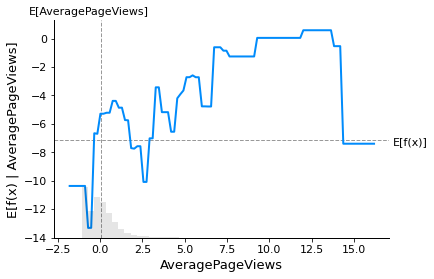

In [34]:
shap.plots.partial_dependence(
    "AveragePageViews", xgb_reg.predict, X_test_enc, ice=False,
    model_expected_value=True, feature_expected_value=True
)

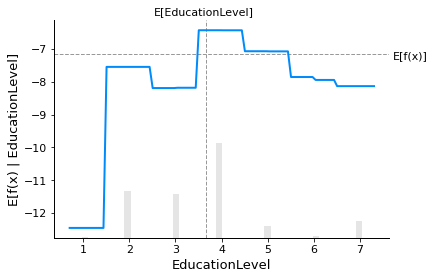

In [189]:
shap.plots.partial_dependence(
    "EducationLevel", xgb_reg.predict, X_test_enc, ice=False,
    model_expected_value=True, feature_expected_value=True
)

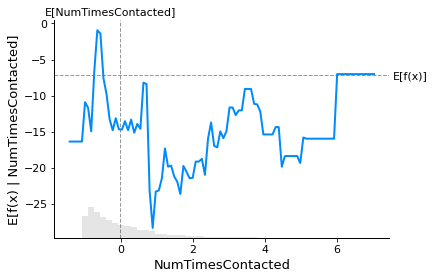

In [187]:
shap.plots.partial_dependence(
    "NumTimesContacted", xgb_reg.predict, X_test_enc, ice=False,
    model_expected_value=True, feature_expected_value=True
)

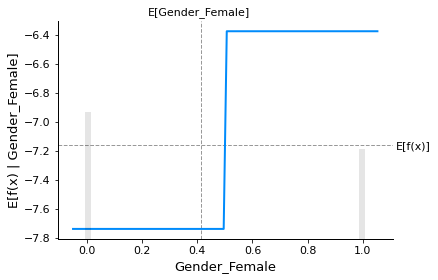

In [193]:
shap.plots.partial_dependence(
    "Gender_Female", xgb_reg.predict, X_test_enc, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [48]:
# JUAN: Crea un plot para cada variable e interpretalos, de manera que vemos como cada variable afecta al hubspot score 

Let's continue looking at how the variables afect the model

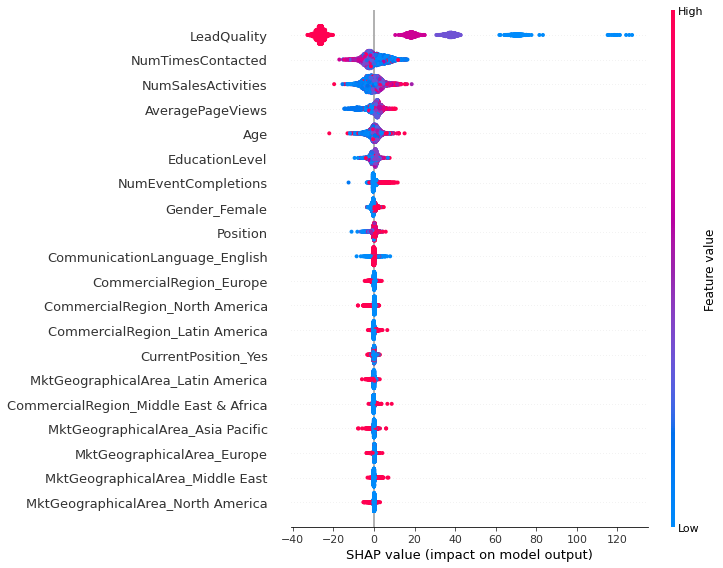

In [135]:
sample_ind = 15
feature_columns = ['Age', 'Gender_Female', 'Gender_Male',
       'MktGeographicalArea_Latin America', 'MktGeographicalArea_Middle East',
       'MktGeographicalArea_Europe', 'MktGeographicalArea_Asia Pacific',
       'MktGeographicalArea_Spain', 'MktGeographicalArea_North America',
       'MktGeographicalArea_Africa', 'MktGeographicalArea_Europe-cis',
       'MktGeographicalArea_Middle East And North Africa',
       'CommunicationLanguage_English', 'CommunicationLanguage_Spanish',
       'CommercialRegion_Latin America',
       'CommercialRegion_Middle East & Africa', 'CommercialRegion_Europe',
       'CommercialRegion_Asia-Pacific', 'CommercialRegion_Spain',
       'CommercialRegion_North America', 'EducationLevel', 'Position',
       'MainPosition_No', 'MainPosition_Yes', 'CurrentPosition_Yes',
       'CurrentPosition_No', 'LeadQuality', 'NumSalesActivities',
       'NumTimesContacted', 'AveragePageViews', 'NumEventCompletions']


#shap.plots.waterfall(shap_values1[sample_ind], max_display=14)

shap.summary_plot(shap_values1, X_test_enc, feature_names=feature_columns)

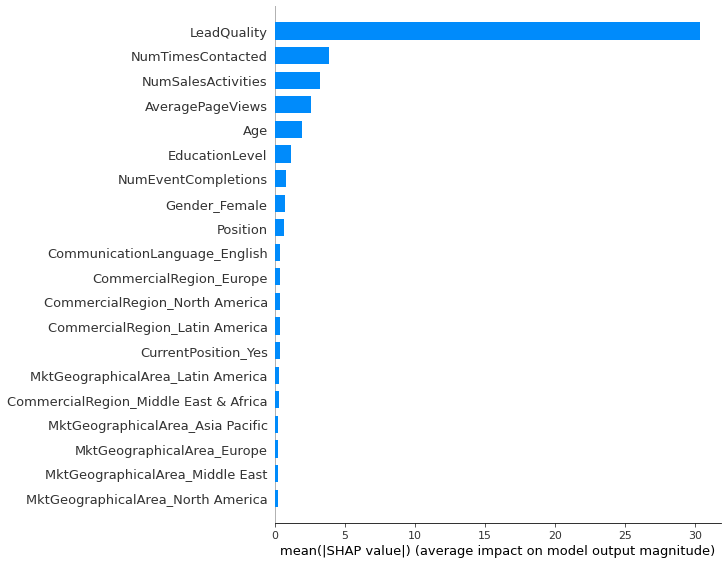

In [136]:
shap.summary_plot(shap_values1, X_test_enc, feature_names=feature_columns,plot_type="bar")

In [137]:
shap.initjs()

One random sample with a negative hub spot score

In [186]:
X_test_enc["NumSalesActivities"].mean()

-0.003139415675208031

In [180]:
data_for_prediction = X_test_enc.iloc[2080]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
data_for_prediction_array

array([[-0.53647355,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         3.        ,  5.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  4.        , -0.9015244 , -0.86354873, -0.97407407,
        -0.12745097]])

In [181]:
xgb_reg.predict(data_for_prediction_array)

array([7.5412755], dtype=float32)

In [182]:
shap_values2 = explainer.shap_values(data_for_prediction_array)

In [183]:
shap.force_plot(explainer.expected_value, shap_values2, data_for_prediction)

Another random sample with a positive hub spot score

In [150]:
data_for_prediction2 = X_test_enc.iloc[500]  
data_for_prediction_array2 = data_for_prediction2.values.reshape(1, -1)
data_for_prediction_array2

array([[-1.58639479,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         5.        ,  5.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  5.        ,  1.83021093,  2.11787117, -0.60350131,
        -0.12745097]])

In [151]:
xgb_reg.predict(data_for_prediction_array2)

array([-18.42673], dtype=float32)

In [152]:
shap_values2 = explainer.shap_values(data_for_prediction_array2)

In [153]:
shap.force_plot(explainer.expected_value, shap_values2, data_for_prediction2)